# Spatial dependence

In [ ]:
# 📚 Setup ---------------------------------------------------------------------
library(haven)
library(ggstatsplot)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

In [ ]:
# Load dataset
data <- read_dta("../data/india520.dta")

In [ ]:
# 🏗 Basic OLS Regression -----------------------------------------------------
model1 <- lm(light_growth96_10rcr_cap ~ log_light96_rcr_cap, data = data)
summary(model1)


Call:
lm(formula = light_growth96_10rcr_cap ~ log_light96_rcr_cap, 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.110924 -0.022972  0.001766  0.020301  0.198850 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.072274   0.007382   -9.79   <2e-16 ***
log_light96_rcr_cap -0.019881   0.001494  -13.31   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03722 on 518 degrees of freedom
Multiple R-squared:  0.2547,    Adjusted R-squared:  0.2533 
F-statistic:   177 on 1 and 518 DF,  p-value: < 2.2e-16

In [ ]:
# 📝 Compute regression model for annotation ----------------------------------
model <- lm(light_growth96_10rcr_cap ~ log_light96_rcr_cap, data = data)
slope <- round(coef(model)[2], 3)
rsq   <- round(summary(model)$r.squared, 3)

Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2

`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.

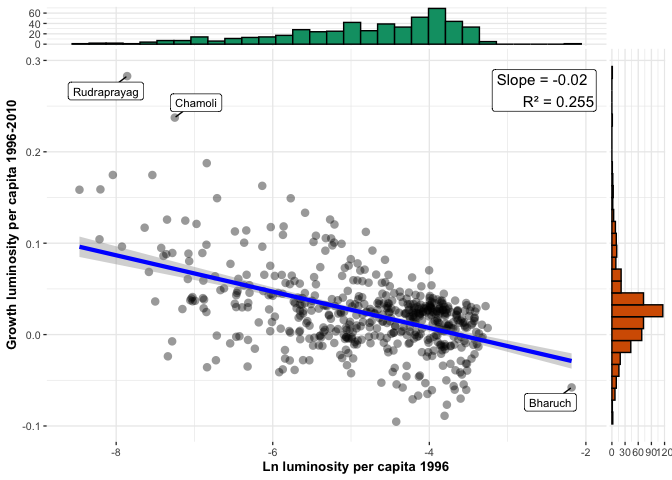

In [ ]:
#| label: fig-convergence
#| fig-cap: "Regional luminosity convergence across districts in India"
p1 <- ggscatterstats(
  data = data,
  x = log_light96_rcr_cap,
  y = light_growth96_10rcr_cap,
  label.var = district,
  label.expression = (log_light96_rcr_cap > -3 & light_growth96_10rcr_cap < 0) | (log_light96_rcr_cap <-7 & light_growth96_10rcr_cap > 0.2),
  results.subtitle = FALSE,
  xlab = "Ln luminosity per capita 1996",
  ylab = "Growth luminosity per capita 1996-2010"
) +
annotate("label", 
           x = Inf, 
           y = Inf, 
           label = paste("Slope =", slope, "\nR² =", rsq), 
           hjust = 1.1, 
           vjust = 1.5, 
           size = 4)

`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.

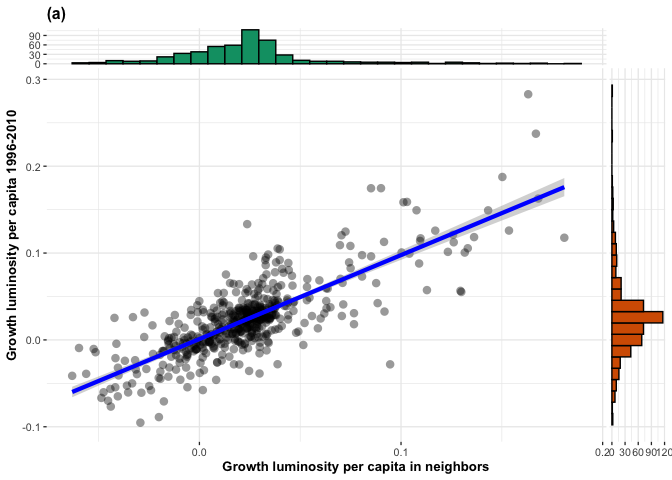

In [ ]:
#| label: fig-dependence1
#| fig-cap: "Spatial dependence in the growth rate and initial level of luminosity"
p2 <- ggscatterstats(
  data = data,
  x = SL_light_growth96_10rcr_cap,
  y = light_growth96_10rcr_cap,
  results.subtitle = FALSE,
  title = "(a)",
  xlab = "Growth luminosity per capita in neighbors",
  ylab = "Growth luminosity per capita 1996-2010"
)
p2

`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.

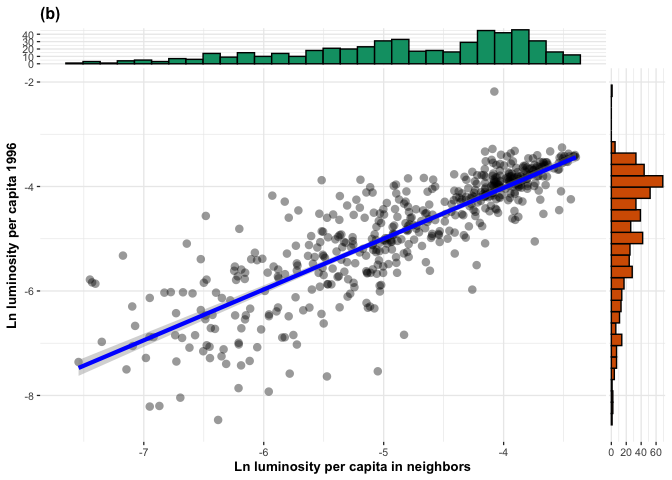

In [ ]:
#| label: fig-dependence2
#| fig-cap: "Spatial dependence in the growth rate and initial level of luminosity"
p3 <- ggscatterstats(
  data = data,
  x = SL_log_light96_rcr_cap,
  y = log_light96_rcr_cap,
  results.subtitle = FALSE,
  title = "(b)",
  xlab = "Ln luminosity per capita in neighbors",
  ylab = "Ln luminosity per capita 1996"
)
p3

`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.

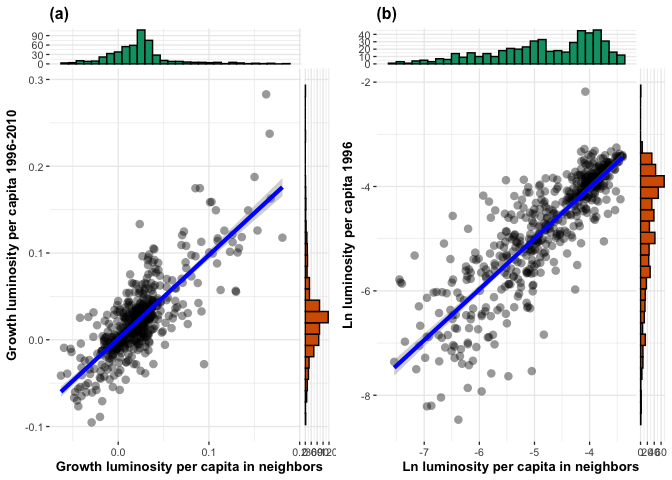

In [ ]:
#| label: fig-dependence-combined
#| fig-cap: "Spatial dependence in the growth rate and initial level of luminosity"

combined <- plot_grid(p2, p3, ncol = 2)